## Uber Dataset Cleaning

Cleaning for a dataset on uber trips in new york city. Will potnetially be integrated with the taxi dataset to be used in predictive modelling for vehicular traffic, depending on compatability.

Taken from https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city?select=Uber-Jan-Feb-FOIL.csv

NOTE: The full file size for this dataset is large, as is split up into several portions. I will be looking at a single portion as a test case

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Read data frame from csv file
df = pd.read_csv('archive/Uber/uber-raw-data-sep14.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#Read size from csv
df.shape

(1028136, 4)

In [7]:
#Checking for duplicate values

df.duplicated().sum()

#24037 duplicates in original data. Due to the relatively few features, this could represent coincidence in such a large dataset, however, the specificity of latitude/longitudinal data may indicate error. For now, I will leave it in 

24037

In [8]:
#Basic information on dataframe features and feature types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [9]:
#Sorting categorical and continuous features

continuous = ['Date/Time', 'Base']
categorical = ['Lat', 'Lon']

In [10]:
#Checking for missing values

full = continuous + categorical

for item in full:
    percent_missing = df[item].isnull().sum() * 100 / len(df)
    print(percent_missing)

#no data appears to have a null value

0.0
0.0
0.0
0.0


array([[<AxesSubplot:title={'center':'Lat'}>],
       [<AxesSubplot:title={'center':'Lon'}>]], dtype=object)

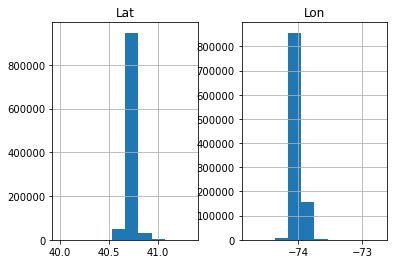

In [11]:
#Plot histograms for continuous features

df.hist().T

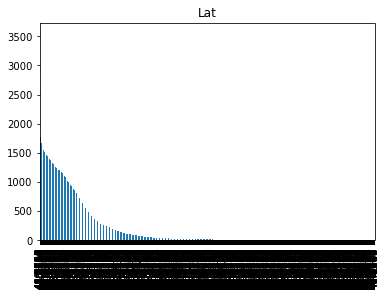

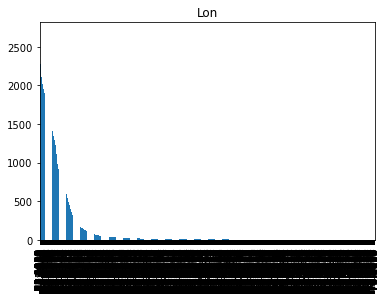

In [12]:
#Plot bar plots for categorical features

for item in categorical:
    df[item].value_counts(dropna=False).plot(kind='bar', title=item)
    plt.show()

In [ ]:
#no major alterations made thus far. This is a remakably simple and clean dataset

In [ ]:
#plotting pickups on map with a heatmap style
#ATM this breaks my computer

fig = px.density_mapbox(df, lat='latitude', lon='longitude', mapbox_style='stamen-terrain')
fig.show()